In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Using TensorFlow backend.


In [2]:
df = pd.read_csv('gender_classification_v7.csv')
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [3]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [4]:
mapping = {'Male' : 0, 'Female' : 1}
x = df.gender.map(mapping)

df.insert(8, 'gender_label', df.gender.map(mapping))

In [5]:
df = df.drop(['gender'], axis=1)
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender_label
0,1,11.8,6.1,1,0,1,1,0
1,0,14.0,5.4,0,0,1,0,1
2,0,11.8,6.3,1,1,1,1,0
3,0,14.4,6.1,0,1,1,1,0
4,1,13.5,5.9,0,0,0,0,1


In [ ]:
df.head()

In [6]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

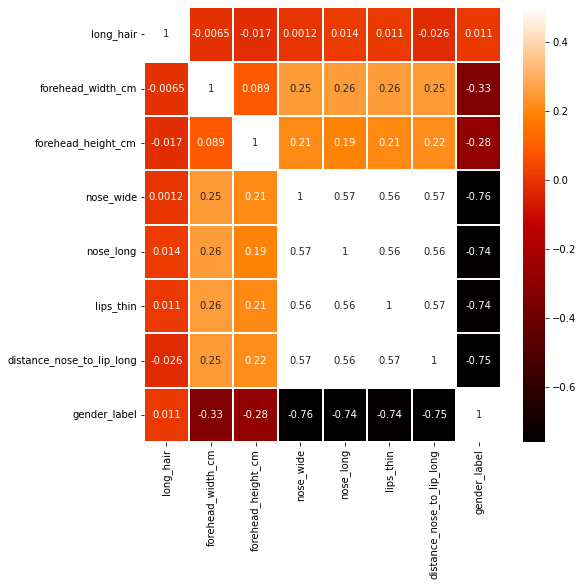

In [7]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, cmap=plt.cm.gist_heat, linecolor='white', annot=True)
plt.show()

In [8]:
dataset = df.values
X = dataset[:,0:7].astype(np.float32)
Y_obj = dataset[:,7]

In [9]:
e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)
Y = Y.astype(np.float32)

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)

In [11]:
# 변형 객체 생성
minmax_scaler = MinMaxScaler()
# 훈련데이터의 모수 분포 저장
minmax_scaler.fit(X_train)
# 훈련 데이터 스케일링
X_train = minmax_scaler.transform(X_train)
# 테스트 데이터의 스케일링
X_test = minmax_scaler.transform(X_test)

In [12]:
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [15]:
model.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['accuracy'])

In [16]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=100)

In [17]:
history = model.fit(X_train, Y_train, epochs = 500, callbacks=[early_stopping_callback]
                    ,validation_data=(X_test, Y_test))
results = model.evaluate(X_test, Y_test)
results

Train on 3500 samples, validate on 1501 samples
Epoch 1/500
3500/3500 [==============================] - 2s 459us/sample - loss: 0.1748 - accuracy: 0.6923 - val_loss: 0.1186 - val_accuracy: 0.9121
Epoch 2/500
3500/3500 [==============================] - 0s 91us/sample - loss: 0.0781 - accuracy: 0.9466 - val_loss: 0.0487 - val_accuracy: 0.9600
Epoch 3/500
3500/3500 [==============================] - 0s 93us/sample - loss: 0.0403 - accuracy: 0.9537 - val_loss: 0.0328 - val_accuracy: 0.9634
Epoch 4/500
3500/3500 [==============================] - 0s 89us/sample - loss: 0.0320 - accuracy: 0.9569 - val_loss: 0.0288 - val_accuracy: 0.9647
Epoch 5/500
3500/3500 [==============================] - 0s 91us/sample - loss: 0.0289 - accuracy: 0.9609 - val_loss: 0.0270 - val_accuracy: 0.9640
Epoch 6/500
3500/3500 [==============================] - 0s 90us/sample - loss: 0.0274 - accuracy: 0.9611 - val_loss: 0.0256 - val_accuracy: 0.9674
Epoch 7/500
3500/3500 [==============================] - 0s 91u

Epoch 56/500
3500/3500 [==============================] - 0s 91us/sample - loss: 0.0207 - accuracy: 0.9697 - val_loss: 0.0216 - val_accuracy: 0.9714
Epoch 57/500
3500/3500 [==============================] - 0s 83us/sample - loss: 0.0209 - accuracy: 0.9700 - val_loss: 0.0219 - val_accuracy: 0.9734
Epoch 58/500
3500/3500 [==============================] - 0s 85us/sample - loss: 0.0209 - accuracy: 0.9691 - val_loss: 0.0216 - val_accuracy: 0.9714
Epoch 59/500
3500/3500 [==============================] - 0s 85us/sample - loss: 0.0205 - accuracy: 0.9703 - val_loss: 0.0219 - val_accuracy: 0.9667
Epoch 60/500
3500/3500 [==============================] - 0s 83us/sample - loss: 0.0208 - accuracy: 0.9691 - val_loss: 0.0216 - val_accuracy: 0.9707
Epoch 61/500
3500/3500 [==============================] - 0s 83us/sample - loss: 0.0206 - accuracy: 0.9703 - val_loss: 0.0217 - val_accuracy: 0.9700
Epoch 62/500
3500/3500 [==============================] - 0s 84us/sample - loss: 0.0205 - accuracy: 0.9709

Epoch 111/500
3500/3500 [==============================] - 0s 83us/sample - loss: 0.0185 - accuracy: 0.9734 - val_loss: 0.0210 - val_accuracy: 0.9700
Epoch 112/500
3500/3500 [==============================] - 0s 85us/sample - loss: 0.0180 - accuracy: 0.9751 - val_loss: 0.0212 - val_accuracy: 0.9707
Epoch 113/500
3500/3500 [==============================] - 0s 86us/sample - loss: 0.0182 - accuracy: 0.9740 - val_loss: 0.0211 - val_accuracy: 0.9714
Epoch 114/500
3500/3500 [==============================] - 0s 80us/sample - loss: 0.0179 - accuracy: 0.9757 - val_loss: 0.0214 - val_accuracy: 0.9714
Epoch 115/500
3500/3500 [==============================] - 0s 81us/sample - loss: 0.0181 - accuracy: 0.9749 - val_loss: 0.0214 - val_accuracy: 0.9727
Epoch 116/500
3500/3500 [==============================] - 0s 87us/sample - loss: 0.0183 - accuracy: 0.9751 - val_loss: 0.0214 - val_accuracy: 0.9714
Epoch 117/500
3500/3500 [==============================] - 0s 84us/sample - loss: 0.0182 - accuracy:

[0.021312210541175085, 0.97135246]

In [18]:
history_dic = history.history
history_dic.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

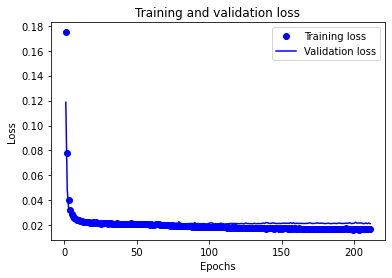

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

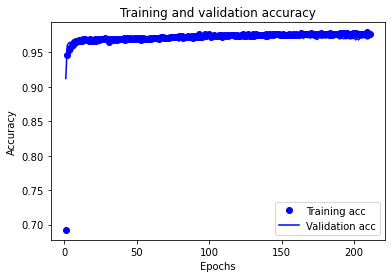

In [20]:
plt.clf()
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [21]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [22]:
history = model.fit(X_train, Y_train, epochs = 500, callbacks=[early_stopping_callback]
                    ,validation_data=(X_test, Y_test))
results = model.evaluate(X_test, Y_test)
results

Train on 3500 samples, validate on 1501 samples
Epoch 1/500
3500/3500 [==============================] - 1s 354us/sample - loss: 0.0612 - accuracy: 0.9771 - val_loss: 0.0830 - val_accuracy: 0.9700
Epoch 2/500
3500/3500 [==============================] - 0s 90us/sample - loss: 0.0590 - accuracy: 0.9783 - val_loss: 0.0830 - val_accuracy: 0.9687
Epoch 3/500
3500/3500 [==============================] - 0s 87us/sample - loss: 0.0591 - accuracy: 0.9749 - val_loss: 0.0821 - val_accuracy: 0.9707
Epoch 4/500
3500/3500 [==============================] - 0s 88us/sample - loss: 0.0587 - accuracy: 0.9760 - val_loss: 0.0822 - val_accuracy: 0.9707
Epoch 5/500
3500/3500 [==============================] - 0s 89us/sample - loss: 0.0589 - accuracy: 0.9774 - val_loss: 0.0823 - val_accuracy: 0.9714
Epoch 6/500
3500/3500 [==============================] - 0s 87us/sample - loss: 0.0590 - accuracy: 0.9771 - val_loss: 0.0820 - val_accuracy: 0.9700
Epoch 7/500
3500/3500 [==============================] - 0s 87u

Epoch 56/500
3500/3500 [==============================] - 0s 91us/sample - loss: 0.0550 - accuracy: 0.9777 - val_loss: 0.0810 - val_accuracy: 0.9714
Epoch 57/500
3500/3500 [==============================] - 0s 87us/sample - loss: 0.0562 - accuracy: 0.9774 - val_loss: 0.0816 - val_accuracy: 0.9707
Epoch 58/500
3500/3500 [==============================] - 0s 88us/sample - loss: 0.0562 - accuracy: 0.9769 - val_loss: 0.0810 - val_accuracy: 0.9694
Epoch 59/500
3500/3500 [==============================] - 0s 87us/sample - loss: 0.0557 - accuracy: 0.9786 - val_loss: 0.0818 - val_accuracy: 0.9700
Epoch 60/500
3500/3500 [==============================] - 0s 85us/sample - loss: 0.0556 - accuracy: 0.9769 - val_loss: 0.0811 - val_accuracy: 0.9700
Epoch 61/500
3500/3500 [==============================] - 0s 85us/sample - loss: 0.0553 - accuracy: 0.9780 - val_loss: 0.0811 - val_accuracy: 0.9687
Epoch 62/500
3500/3500 [==============================] - 0s 88us/sample - loss: 0.0556 - accuracy: 0.9766

Epoch 111/500
3500/3500 [==============================] - 0s 99us/sample - loss: 0.0554 - accuracy: 0.9766 - val_loss: 0.0804 - val_accuracy: 0.9714
Epoch 112/500
3500/3500 [==============================] - 0s 88us/sample - loss: 0.0539 - accuracy: 0.9774 - val_loss: 0.0813 - val_accuracy: 0.9714
Epoch 113/500
3500/3500 [==============================] - 0s 89us/sample - loss: 0.0552 - accuracy: 0.9774 - val_loss: 0.0813 - val_accuracy: 0.9700
Epoch 114/500
3500/3500 [==============================] - 0s 93us/sample - loss: 0.0539 - accuracy: 0.9794 - val_loss: 0.0811 - val_accuracy: 0.9700
Epoch 115/500
3500/3500 [==============================] - 0s 92us/sample - loss: 0.0542 - accuracy: 0.9780 - val_loss: 0.0809 - val_accuracy: 0.9700
Epoch 116/500
3500/3500 [==============================] - 0s 84us/sample - loss: 0.0550 - accuracy: 0.9763 - val_loss: 0.0834 - val_accuracy: 0.9687
Epoch 117/500
3500/3500 [==============================] - 0s 98us/sample - loss: 0.0547 - accuracy:

[0.08124199271360927, 0.97002]

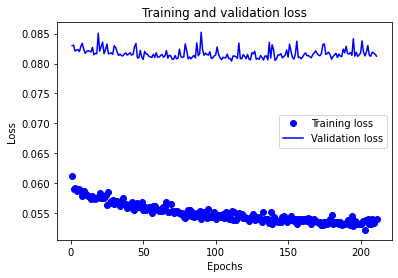

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

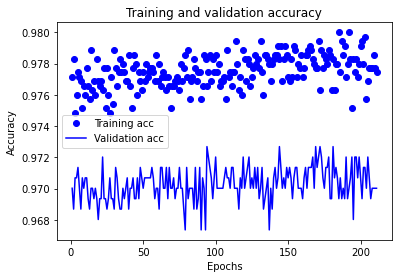

In [24]:
plt.clf()
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [13]:
model = Sequential()
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [17]:
history = model.fit(X_train, Y_train, epochs = 500, callbacks=[early_stopping_callback]
                    ,validation_data=(X_test, Y_test))
results = model.evaluate(X_test, Y_test)
results

Train on 3500 samples, validate on 1501 samples
Epoch 1/500
3500/3500 [==============================] - 2s 566us/sample - loss: 0.5096 - accuracy: 0.6994 - val_loss: 0.3914 - val_accuracy: 0.8941
Epoch 2/500
3500/3500 [==============================] - 0s 86us/sample - loss: 0.2973 - accuracy: 0.9311 - val_loss: 0.2132 - val_accuracy: 0.9594
Epoch 3/500
3500/3500 [==============================] - 0s 88us/sample - loss: 0.1652 - accuracy: 0.9546 - val_loss: 0.1293 - val_accuracy: 0.9614
Epoch 4/500
3500/3500 [==============================] - 0s 89us/sample - loss: 0.1178 - accuracy: 0.9574 - val_loss: 0.1047 - val_accuracy: 0.9647
Epoch 5/500
3500/3500 [==============================] - 0s 89us/sample - loss: 0.1019 - accuracy: 0.9580 - val_loss: 0.0953 - val_accuracy: 0.9667
Epoch 6/500
3500/3500 [==============================] - 0s 88us/sample - loss: 0.0941 - accuracy: 0.9609 - val_loss: 0.0911 - val_accuracy: 0.9660
Epoch 7/500
3500/3500 [==============================] - 0s 91u

Epoch 56/500
3500/3500 [==============================] - 0s 85us/sample - loss: 0.0703 - accuracy: 0.9674 - val_loss: 0.0833 - val_accuracy: 0.9694
Epoch 57/500
3500/3500 [==============================] - 0s 96us/sample - loss: 0.0701 - accuracy: 0.9686 - val_loss: 0.0831 - val_accuracy: 0.9714
Epoch 58/500
3500/3500 [==============================] - 0s 90us/sample - loss: 0.0702 - accuracy: 0.9694 - val_loss: 0.0832 - val_accuracy: 0.9720
Epoch 59/500
3500/3500 [==============================] - 0s 86us/sample - loss: 0.0700 - accuracy: 0.9663 - val_loss: 0.0862 - val_accuracy: 0.9660
Epoch 60/500
3500/3500 [==============================] - 0s 85us/sample - loss: 0.0705 - accuracy: 0.9677 - val_loss: 0.0832 - val_accuracy: 0.9720
Epoch 61/500
3500/3500 [==============================] - 0s 87us/sample - loss: 0.0703 - accuracy: 0.9686 - val_loss: 0.0837 - val_accuracy: 0.9674
Epoch 62/500
3500/3500 [==============================] - 0s 89us/sample - loss: 0.0702 - accuracy: 0.9683

Epoch 111/500
3500/3500 [==============================] - 0s 96us/sample - loss: 0.0692 - accuracy: 0.9700 - val_loss: 0.0839 - val_accuracy: 0.9694
Epoch 112/500
3500/3500 [==============================] - 0s 89us/sample - loss: 0.0690 - accuracy: 0.9706 - val_loss: 0.0839 - val_accuracy: 0.9707
Epoch 113/500
3500/3500 [==============================] - 0s 87us/sample - loss: 0.0688 - accuracy: 0.9697 - val_loss: 0.0850 - val_accuracy: 0.9707
Epoch 114/500
3500/3500 [==============================] - 0s 84us/sample - loss: 0.0694 - accuracy: 0.9697 - val_loss: 0.0840 - val_accuracy: 0.9707
Epoch 115/500
3500/3500 [==============================] - 0s 97us/sample - loss: 0.0691 - accuracy: 0.9691 - val_loss: 0.0837 - val_accuracy: 0.9714
1501/1 [==================================================================================================================================================================================================================================================

[0.08372302250632598, 0.97135246]

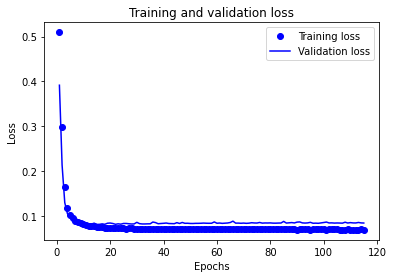

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss= history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

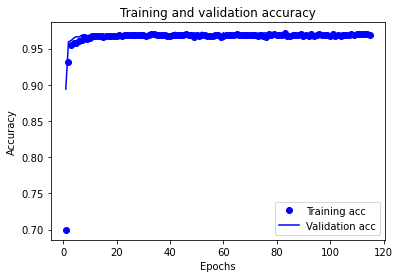

In [19]:
plt.clf()
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()